In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten
Cluster 1:
 google
 feedback
 map
 app
 impressed
 incredible
 translate
 key
 extension
 chrome


Prediction
[1]
[0]


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import pandas as pd

In [6]:
data = pd.read_csv('/Users/daviddeng8/Documents/Projects/affinity/data/outlet_data.csv')
content = data['content']
content

0          I want to receive updates from partners and...
1          I want to receive updates from partners and...
2       That’s because, as with everything else, Trump...
3               For us to continue writing great stori...
4          I want to receive updates from partners and...
                              ...                        
2995         In his first public remarks as   Donald T...
2996              Two Republican lawmakers charged wit...
2997                 Caption   Businessman Donald Trum...
2998     Yes, the big Wisconsin story is Ted Cruz’s cr...
2999      BERLIN  —   When hundreds of thousands of mi...
Name: content, Length: 3000, dtype: object

In [9]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(content)

Z = vectorizer.get_feature_names()
Z

['00',
 '000',
 '0000',
 '0002266',
 '000km',
 '000mw',
 '000sq',
 '002',
 '0025hrs',
 '003',
 '004',
 '006',
 '007',
 '00am',
 '00pm',
 '00s',
 '01',
 '0165',
 '019',
 '02',
 '022',
 '024',
 '025',
 '028',
 '02am',
 '03',
 '031',
 '032',
 '0330',
 '035',
 '04',
 '040',
 '041',
 '042',
 '043',
 '045km',
 '05',
 '051',
 '053',
 '055',
 '056',
 '057',
 '058',
 '059',
 '06',
 '062',
 '064',
 '068',
 '07',
 '071',
 '08',
 '0844',
 '088',
 '09',
 '0900',
 '092',
 '0923',
 '093',
 '0f',
 '0s',
 '10',
 '100',
 '1000',
 '100g',
 '100k',
 '100m',
 '100th',
 '101',
 '102',
 '1020',
 '103',
 '104',
 '1040',
 '105',
 '106',
 '1067',
 '107',
 '108',
 '1080p',
 '109',
 '10am',
 '10bn',
 '10c',
 '10k',
 '10m',
 '10mins',
 '10pm',
 '10th',
 '10yt',
 '10½',
 '11',
 '110',
 '110mph',
 '111',
 '1111',
 '1112',
 '1116',
 '112',
 '11216',
 '112th',
 '113',
 '1133',
 '113th',
 '114',
 '115',
 '115th',
 '116',
 '117',
 '118',
 '1180',
 '1182',
 '119',
 '119th',
 '11m',
 '11pm',
 '11th',
 '12',
 '120',
 '120m

In [8]:
num_clusters = 50
model = KMeans(n_clusters = num_clusters)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Cluster 0:
 mateen
 orlando
 said
 attack
 victims
 fbi
 shooting
 police
 pulse
 people
Cluster 1:
 percent
 trump
 clinton
 poll
 voters
 polls
 points
 polling
 margin
 support
Cluster 2:
 trump
 campaign
 donald
 republican
 said
 party
 president
 gop
 republicans
 political
Cluster 3:
 china
 climate
 trump
 energy
 epa
 chinese
 xi
 said
 beijing
 environmental
Cluster 4:
 says
 mother
 theranos
 father
 boy
 child
 life
 said
 hospital
 children
Cluster 5:
 mars
 nasa
 space
 moon
 earth
 mission
 rocket
 astronauts
 spacex
 planet
Cluster 6:
 clinton
 trump
 campaign
 hillary
 election
 said
 donald
 presidential
 vote
 voters
Cluster 7:
 north
 korea
 carolina
 transgender
 lgbt
 law
 state
 gay
 korean
 charlotte
Cluster 8:
 billion
 percent
 company
 said
 shares
 million
 snap
 companies
 year
 investors
Cluster 9:
 sanders
 clinton
 democratic
 bernie
 campaign
 party
 voters
 hillary
 primary
 delegates
Cluster 10:
 comey
 flynn
 trump
 fbi
 investigation
 president
 rus

In [15]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,50):
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    preds = km.predict(X)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X)))
    km_scores.append(-km.score(X))
    
    silhouette = silhouette_score(X,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Score for number of cluster(s) 2: -2891.728114046622
Silhouette score for number of cluster(s) 2: 0.004978975790035721
Score for number of cluster(s) 3: -2878.0447471298985
Silhouette score for number of cluster(s) 3: 0.002151282022919515
Score for number of cluster(s) 4: -2867.2695416643346
Silhouette score for number of cluster(s) 4: 0.0029412981778777023
Score for number of cluster(s) 5: -2858.2313924240543
Silhouette score for number of cluster(s) 5: 0.004140254803677178
Score for number of cluster(s) 6: -2850.2076971951474
Silhouette score for number of cluster(s) 6: 0.0052469928100896904
Score for number of cluster(s) 7: -2844.5648934661713
Silhouette score for number of cluster(s) 7: 0.0037250172467296317
Score for number of cluster(s) 8: -2837.461990238807
Silhouette score for number of cluster(s) 8: 0.004535994287767064
Score for number of cluster(s) 9: -2829.0696262509305
Silhouette score for number of cluster(s) 9: 0.005079082070438583
Score for number of cluster(s) 10: -282

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'elbow method score')

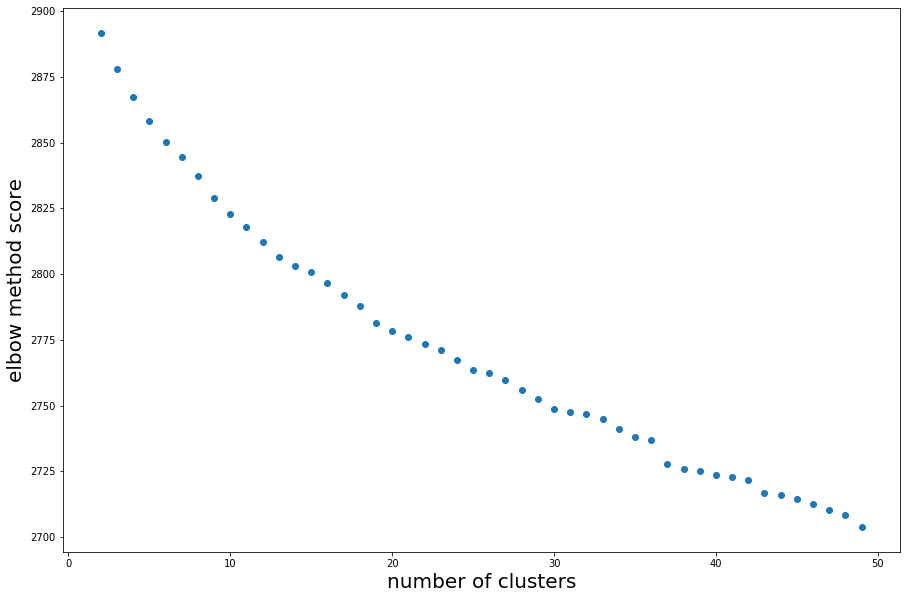

In [17]:
plt.figure(figsize = (15, 10))
plt.scatter(x = [i for i in range(2, 50)], y = km_scores)
plt.xlabel('number of clusters', fontsize=20)
plt.ylabel('elbow method score', fontsize=20)

Text(0, 0.5, 'silhouette score')

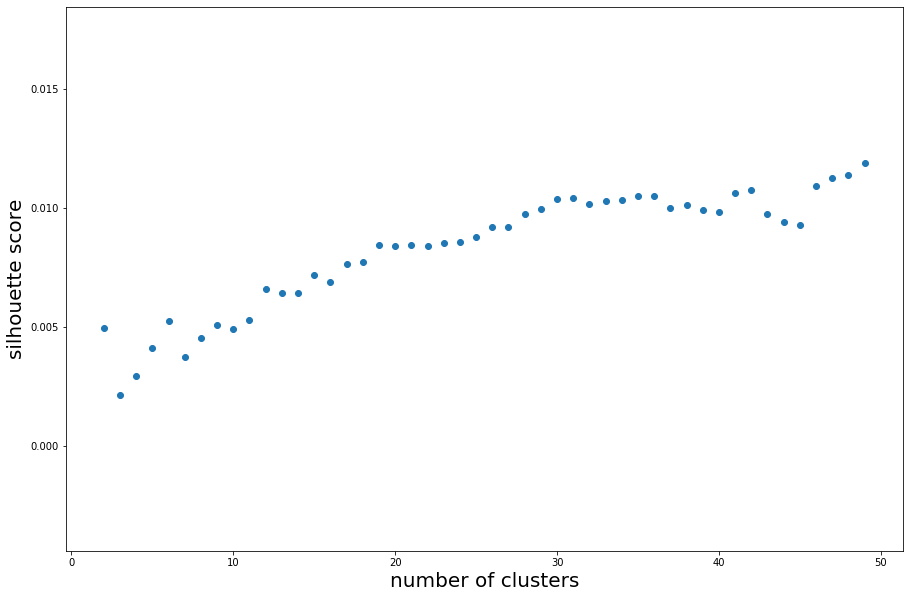

In [18]:
plt.figure(figsize = (15, 10))
plt.scatter(x = [i for i in range(2, 50)], y = km_silhouette)
plt.xlabel('number of clusters', fontsize = 20)
plt.ylabel('silhouette score', fontsize = 20)